In [143]:
import pyodbc
import pandas as pd
con = pyodbc.connect('Trusted_Connection=yes', driver = '{SQL Server}',server = '', database = '')
cursor = con.cursor()

#cursor.execute("SELECT top 10 * FROM allocableusers")
#[dict(zip(zip(*cursor.description)[0], row)) for row in cursor.fetchall()]



data = pd.read_sql_query(' Select count(ClientID) as CountofClient, NumberofProject from (SELECT a.ClientID,count(a.JobID) as NumberofProject FROM allopenjobs a inner join AllActiveClients c on a.ClientID=c.ClientID where c.isAdmin=0 and c.ClientID not in (1,507,752,753,754,755,756,757,758,780,956,983,1104,1253,1254) group by a.ClientID ) job group by NumberofProject', con)
#data[['CountofClient']].max()

import pypyodbc

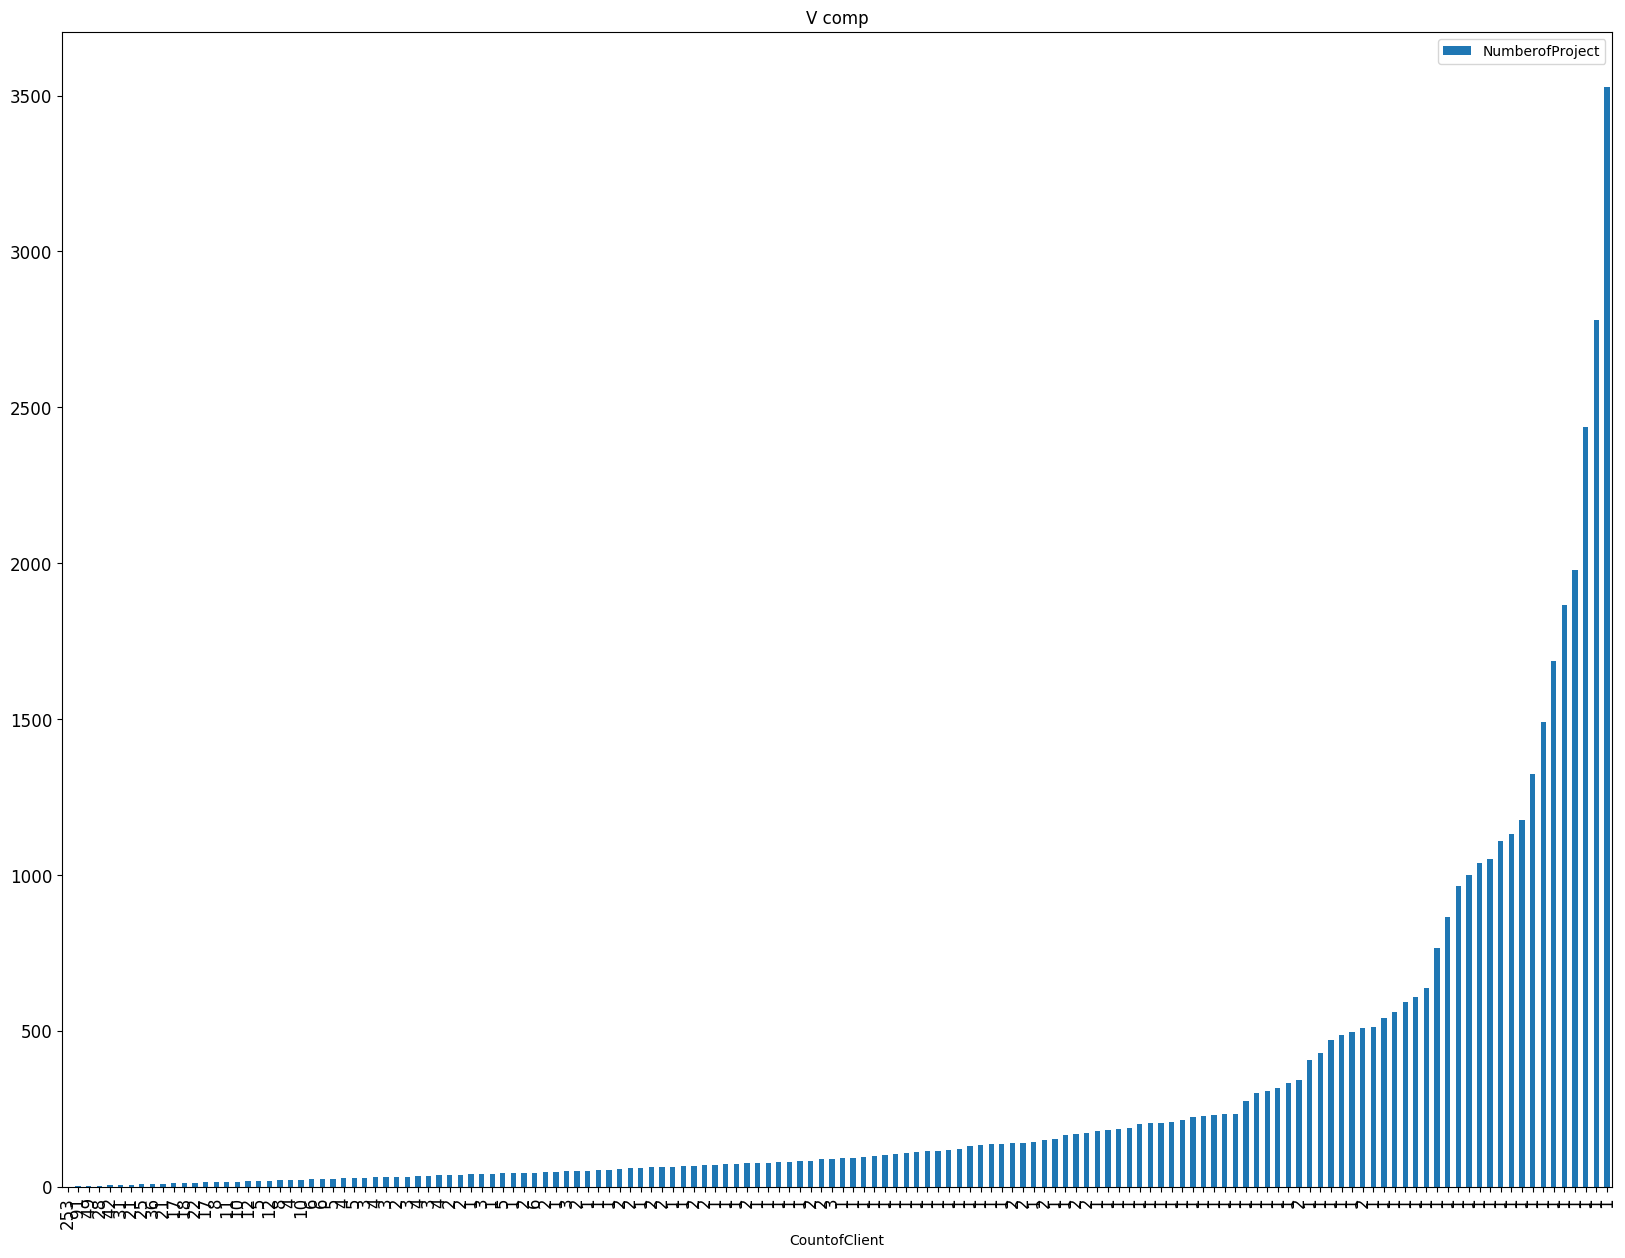

In [146]:
import matplotlib.pyplot as plot
data.plot(kind='bar',x='CountofClient',y='NumberofProject', title ="V comp",figsize=(21, 15), legend=True, fontsize=12)
plot.show()

In [145]:
data

CountofClient  NumberofProject
0              253                1
1               91                2
2               49                3
3               28                4
4               42                5
5               31                6
6               21                7
7               25                8
8               36                9
9               21               10
10              17               11
11              18               12
12              22               13
13              17               14
14               8               15
15              11               16
16              10               17
17              12               18
18               5               19
19              12               20
20               8               21
21               4               22
22              10               23
23               6               24
24               6               25
25               5               26
26               4               27
27               5               28
28               3               29
29               4               30
..             ...              ...
116              2              343
117              1              406
118              1              429
119              1              471
120              1              488
121              1              498
122              2              510
123              1              512
124              1              541
125              1              561
126              1              594
127              1              609
128              1              638
129              1              766
130              1              865
131              1              966
132              1             1000
133              1             1040
134              1             1050
135              1             1109
136              1             1133
137              1             1175
138              1             1323
139              1             1490
140              1             1685
141              1             1867
142              1             1979
143              1             2437
144              1             2781
145              1             3528

[146 rows x 2 columns]

In [ ]:
Select count(ClientID) as countofclient,year, month,sum(NumberofProject) as numberofproject
from
(SELECT a.ClientID
,datepart(year,a.projStartDate) as year
,datepart(month,a.projStartDate) as month
,count(a.JobID) as NumberofProject
 
FROM allopenjobs a inner join 
AllActiveClients c on a.ClientID=c.ClientID
 where c.isAdmin=0 and c.ClientID not in (1,507,752,753,754,755,756,757,758,780,956,983,1104,1253,1254) 
 group by a.ClientID,datepart(year,a.projStartDate),datepart(month,a.projStartDate)) job
 group by year, month
 order by year desc, month